In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
exl = pd.read_excel ('DF_Anime_1(3000).xlsx')
df = pd.DataFrame(exl)
df.head()

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
0,0,Shingeki no Kyojin,"['Action', 'Award Winning', 'Drama', 'Suspense...",TV,8.53,2555635,3577634,2013,24,25,Manga,Wit Studio
1,1,Death Note,"['Supernatural', 'Suspense', 'Psychological', ...",TV,8.62,2521322,3557462,2006,23,37,Manga,Madhouse
2,2,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",TV,9.11,1934569,3031540,2009,24,64,Manga,Bones
3,3,One Punch Man,"['Action', 'Comedy', 'Adult Cast', 'Parody', '...",TV,8.51,2048439,2924287,2015,24,12,Web manga,Madhouse
4,4,Sword Art Online,"['Action', 'Adventure', 'Fantasy', 'Romance', ...",TV,7.20,2011921,2847489,2012,23,25,Light novel,A-1 Pictures


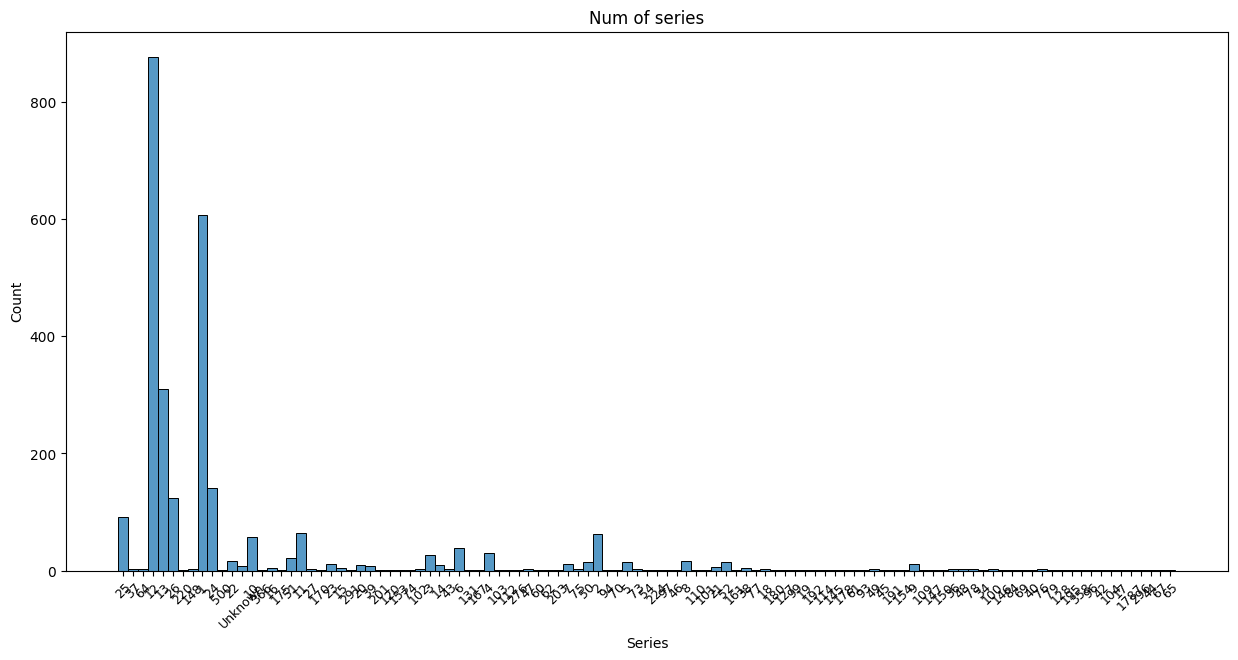

In [3]:
plt.figure(figsize=(15, 7))
sns.histplot(x=df.series, binwidth=0.05)
plt.xlabel('Series')
plt.xticks(rotation=45, size=9)
plt.title('Num of series')
plt.show()

Shortest lenght TV series

In [4]:
df[df.minutes == df.minutes.min()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
1812,1812,Aggressive Retsuko,"['Comedy', 'Anthropomorphic', 'Music', 'Workpl...",TV,7.63,47198,99868,2016,1,100,Other,Fanworks


Longest anime Movie

In [5]:
df[df.minutes == df.minutes.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
1784,1784,Fate/stay night: Unlimited Blade Works 2nd Sea...,"['Action', 'Fantasy', 'Supernatural']",Special,7.46,59832,103396,2015,540,1,Visual novel,ufotable


Longest anime TV (Unknown - anime has not finished)

In [6]:
df[df.series == df.series.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
22,22,One Piece,"['Action', 'Adventure', 'Fantasy', 'Shounen']",TV,8.68,1151198,2016453,1999,24,Unknown,Manga,Toei Animation
196,196,Boruto: Naruto Next Generations,"['Action', 'Adventure', 'Fantasy', 'Martial Ar...",TV,5.74,393183,784434,2017,23,Unknown,Manga,Pierrot
491,491,Mob Psycho 100 III,"['Action', 'Comedy', 'Supernatural', 'Super Po...",TV,8.65,49699,395672,2022,23,Unknown,Web manga,Bones
634,634,Detective Conan,"['Adventure', 'Comedy', 'Mystery', 'Detective'...",TV,8.16,149108,320705,1996,25,Unknown,Manga,TMS Entertainment
2158,2158,Crayon Shin-chan,"['Comedy', 'Ecchi', 'School', 'Seinen']",TV,7.76,37394,75399,1992,21,Unknown,Manga,Shin-Ei Animation
2244,2244,Pokemon (2019),"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",TV,7.24,25147,70740,2019,23,Unknown,Game,OLM
2313,2313,Super Dragon Ball Heroes,"['Action', 'Comedy', 'Fantasy', 'Martial Arts'...",ONA,5.30,26695,67254,2018,480,Unknown,Game,Toei Animation
2336,2336,Kidou Senshi Gundam: Suisei no Majo,"['Sci-Fi', 'Mecha', 'School', 'Space']",TV,7.96,12366,65990,2022,24,Unknown,Original,Sunrise


Best anime

In [7]:
df[df.rating == df.rating.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
2,2,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",TV,9.11,1934569,3031540,2009,24,64,Manga,Bones
685,685,Bleach: Sennen Kessen-hen,"['Action', 'Adventure', 'Fantasy', 'Shounen']",TV,9.11,81142,302787,2022,24,13,Manga,Pierrot


Worst anime

In [8]:
df[df.rating == df.rating.min()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
2373,2373,Hametsu no Mars,"['Horror', 'Sci-Fi']",OVA,2.22,46636,64187,2005,69,1,Visual novel,WAO World


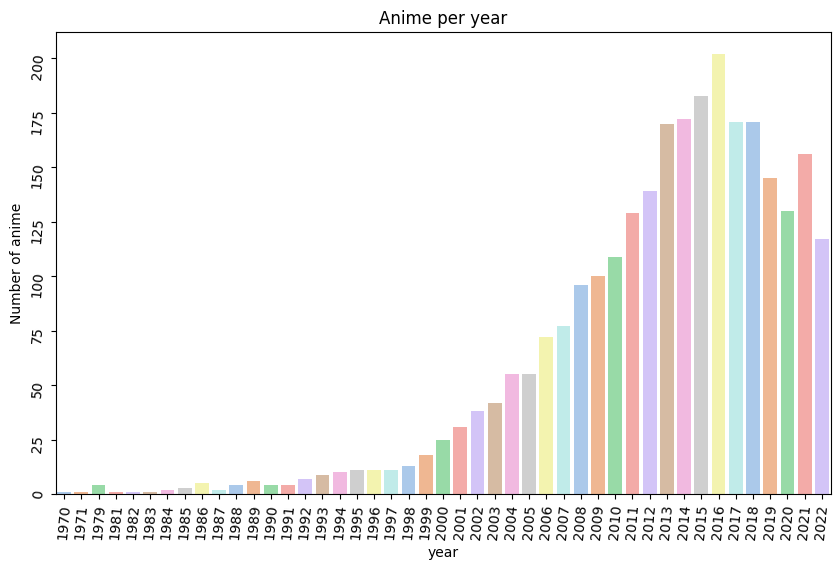

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x= df.year, palette= 'pastel')
plt.title('Anime per year')
plt.ylabel('Number of anime')
plt.tick_params(rotation= 85)
plt.show()

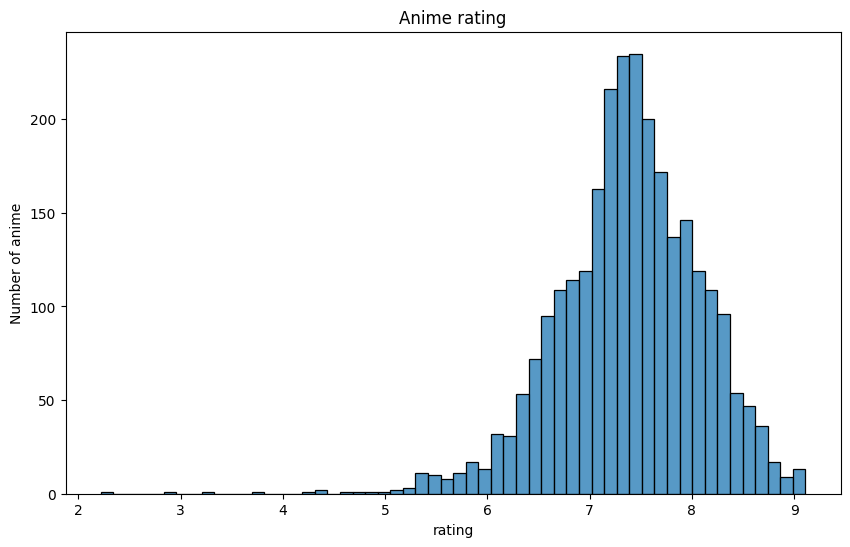

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df.rating)
plt.title('Anime rating')
plt.ylabel('Number of anime')
plt.show()

Word Cloud Titles

<function matplotlib.pyplot.show(close=None, block=None)>

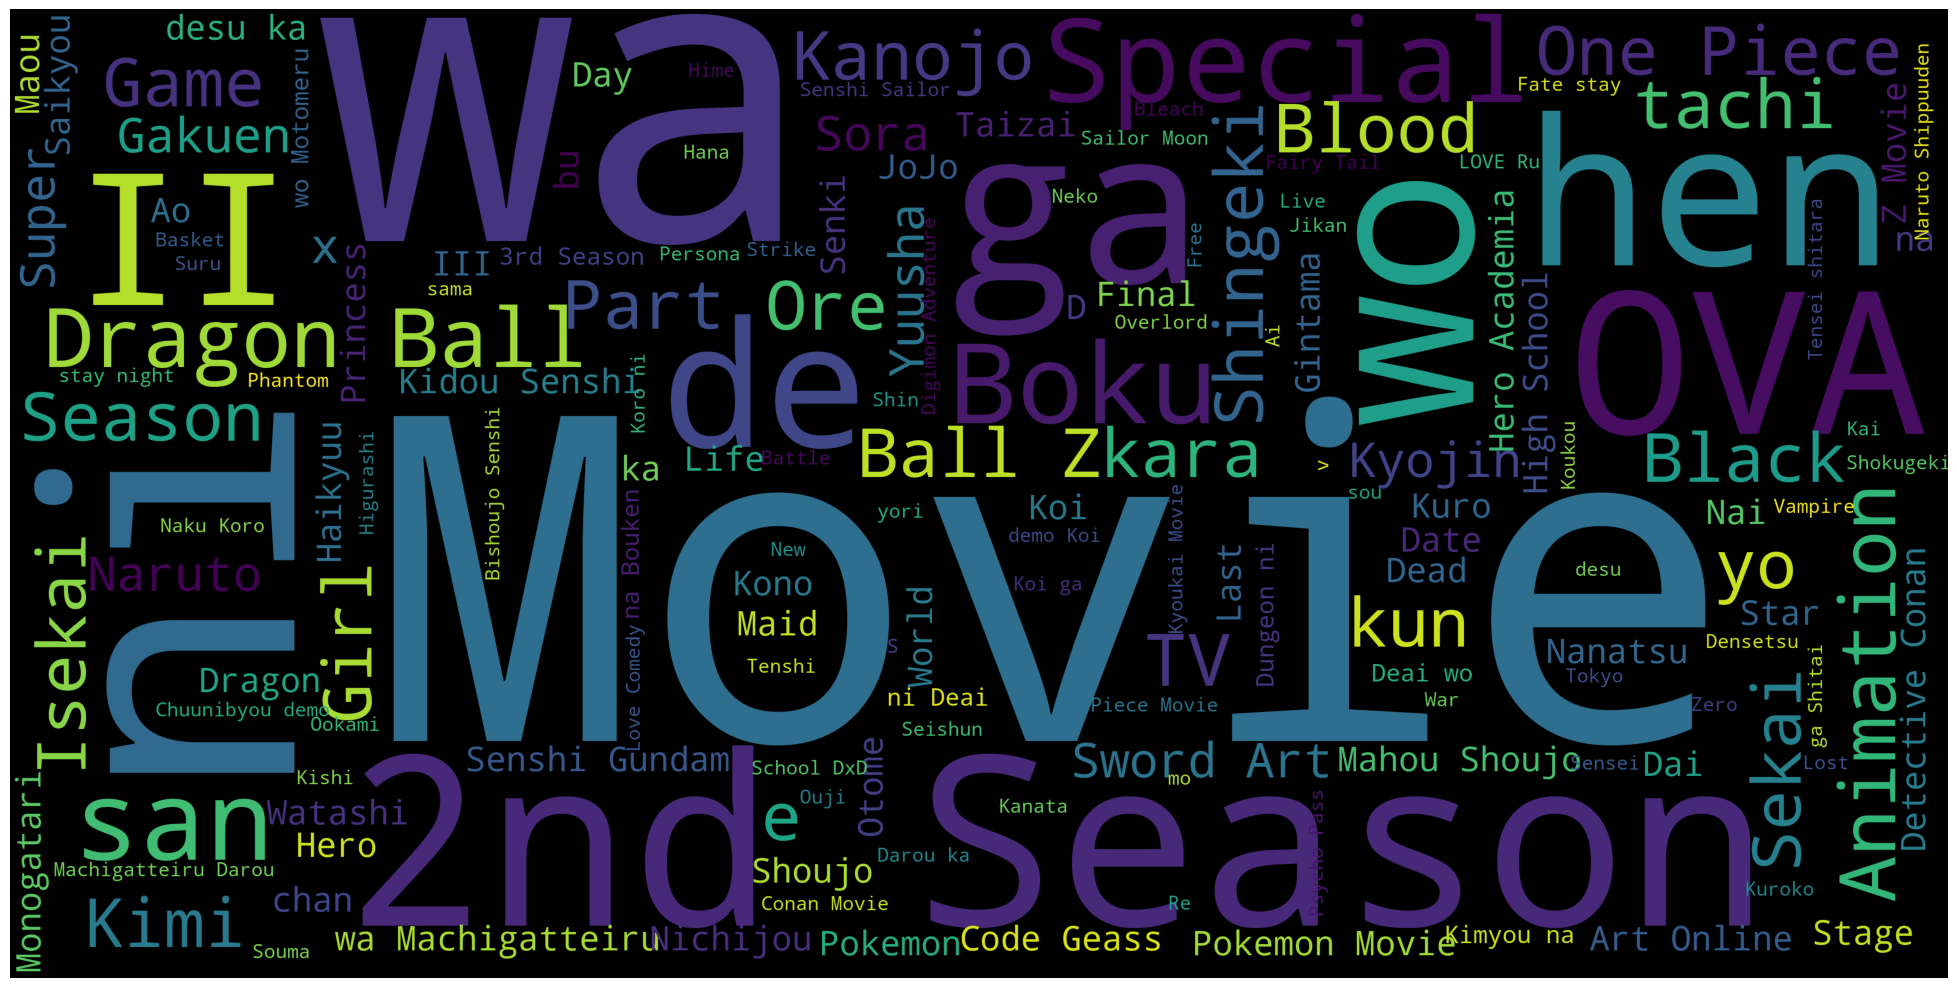

In [11]:
wc= WordCloud(
    max_words= 300,
    scale= 10
)
wc.generate(' '.join(df.title))
plt.figure(figsize=(25, 25))
plt.imshow(wc)
plt.axis('off')
plt.show

Word Cloud Studios

<function matplotlib.pyplot.show(close=None, block=None)>

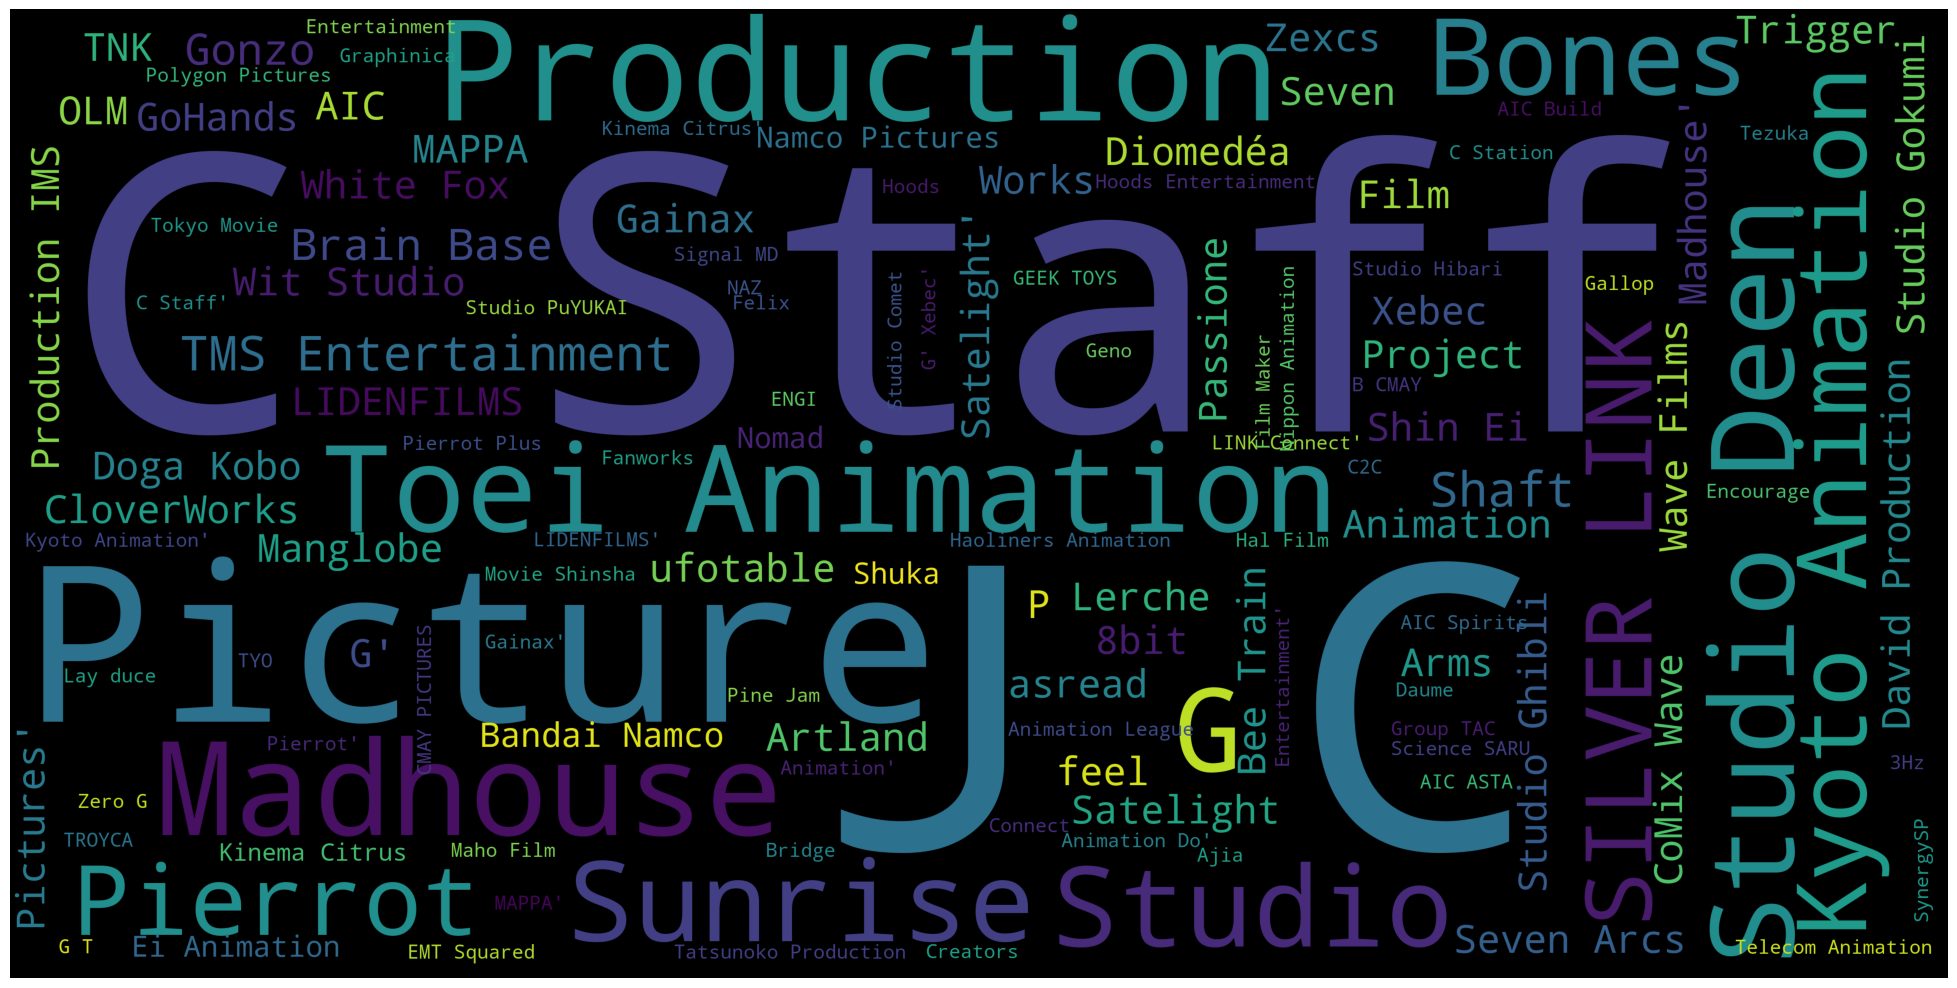

In [12]:
wc= WordCloud(
    max_words= 300,
    scale= 10
)
wc.generate(' '.join(df.studio))
plt.figure(figsize=(25, 25))
plt.imshow(wc)
plt.axis('off')
plt.show

# K-Means Clustering

In [38]:
X_old = df.iloc[:, [ 4, 7]].values
for i in range(len(X_old)):
    if X_old[i][1] < 1999.0:
        # print(type(X[i][1]))
        X_old[i] = 0
X = []
for i in range(len(X_old)):
    if sum(X_old[i]) == 0:
        pass
    elif sum(X_old[i]) > 0:
        X.append([X_old[i][0], X_old[i][1]])
X = np.array(X, dtype=float)

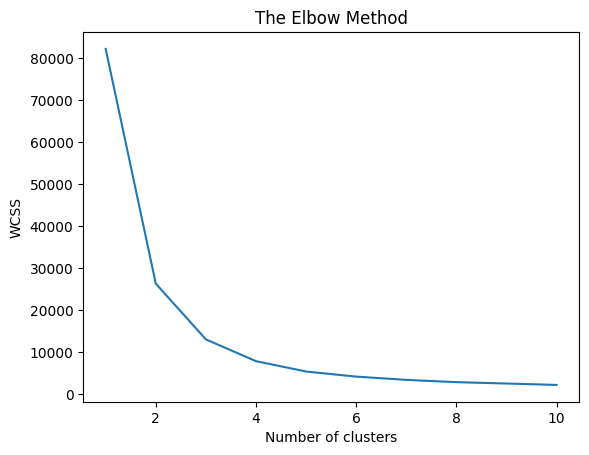

In [39]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
wcss
prop = []
for i in range(len(wcss)):
    print(wcss[i])
    if i == 0:
        pass
    elif i > 0:
        prop.append(wcss[i-1]/wcss[i])
prop.sort()
print(prop)
optimal_num_clusters = round(prop[-1])
print(optimal_num_clusters)

82161.36988421045
26288.65519279009
13016.628782228661
7835.943636930731
5369.545930934127
4158.0683471335815
3381.8007689070996
2838.231453742385
2512.7924963719056
2180.5708934668874
[1.1295128658018376, 1.1523553322207376, 1.1915169090413626, 1.229542670095657, 1.2913558611021132, 1.459330777261371, 1.6611437480077584, 2.019620873622935, 3.1253546171028166]
3


In [41]:
kmeans = KMeans(n_clusters = optimal_num_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(X)
y_kmeans

[[   8.53 2013.  ]
 [   8.62 2006.  ]
 [   9.11 2009.  ]
 ...
 [   6.96 2010.  ]
 [   7.44 2013.  ]
 [   7.27 2001.  ]]


array([0, 2, 0, ..., 0, 0, 2])

In [42]:
df2 = df
y_kmeans_list = list(y_kmeans)
for i in range(len(y_kmeans_list)):
    y_kmeans_list[i] += 1

tmp = list(df.iloc[:, 7].values)

k = 0

clusters = []

for i in range(len(tmp)):
    if int(tmp[i]) >= 1999:
        clusters.append(y_kmeans_list[k])
        k+=1
    else:
        clusters.append('None')

print(clusters)

df2['Cluster'] = clusters
df2.to_excel('Ds_Anime_1(500 anime)_clasters.xlsx')

[1, 3, 1, 1, 1, 2, 2, 3, 1, 1, 2, 2, 1, 2, 3, 1, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 1, 'None', 3, 1, 'None', 3, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 3, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 3, 'None', 'None', 2, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 2, 1, 1, 'None', 1, 'None', 2, 1, 2, 1, 3, 1, 3, 2, 2, 2, 3, 3, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 2, 'None', 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 2, 3, 'None', 1, 3, 3, 1, 2, 1, 1, 3, 3, 3, 2, 2, 1, 2, 1, 1, 2, 3, 2, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 'None', 2, 1, 2, 3, 2, 2, 'None', 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 1, 1, 2, 3, 1, 2, 2, 2, 2, 'None', 3, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 'None', 1, 'None', 1, 2, 2, 2, 2, 1, 2, 2, 3, 1

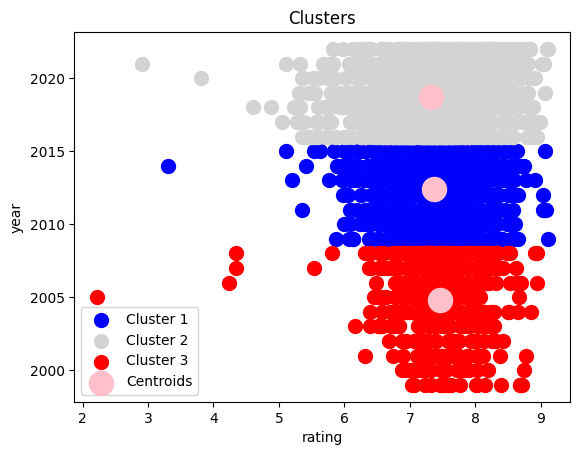

In [43]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightgray', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'pink', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('rating')
plt.ylabel('year')
plt.legend()
plt.show()

# Hierarchical Clustering

In [32]:
X_old = df.iloc[:, [ 4, 7]].values
for i in range(len(X_old)):
    if X_old[i][1] < 1999.0:
        # print(type(X[i][1]))
        X_old[i] = 0
X = []
for i in range(len(X_old)):
    if sum(X_old[i]) == 0:
        pass
    elif sum(X_old[i]) > 0:
        X.append([X_old[i][0], X_old[i][1]])
X = np.array(X, dtype=float)

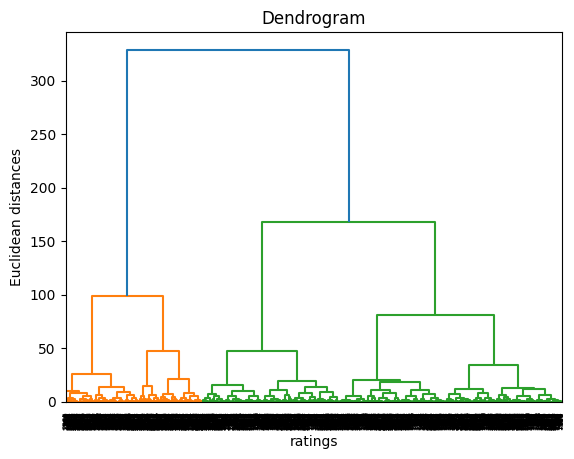

In [33]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('ratings')
plt.ylabel('Euclidean distances')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = optimal_num_clusters, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

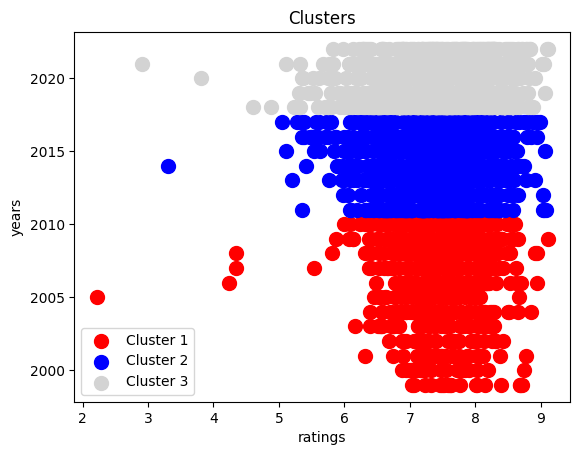

In [35]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'lightgray', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('ratings')
plt.ylabel('years')
plt.legend()
plt.show()